In [1]:
import numpy as np
import praw
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import squarify

 ## <span style = 'color: DodgerBlue'> Data Scraping

In [2]:
reddit = praw.Reddit(client_id = '3yn7f_MjYG0teA-TrLMHAg', client_secret = 'jrSE5-J3tx5hGK0yAGhjSuun-JvI2Q', user_agent = 'practice')

In [3]:

pd.set_option('max_colwidth', None)
df= []
subreddit = reddit.subreddit('datascience')

for post in subreddit.hot(limit = 1000):
    df.append([post.title, post.score, post.url, post.num_comments, post.selftext]) 

df = pd.DataFrame(df, columns = ['title', 'score', 'url', 'num_comments', 'body'])
df.head()

,title,score,url,num_comments,body
0,[Official] 2022 Raises and Bonuses Thread,97,https://www.reddit.com/r/datascience/comments/tdemhx/official_2022_raises_and_bonuses_thread/,55,"Previous [salary threads](https://www.reddit.com/r/datascience/comments/re46xx/official_2021_end_of_year_salary_sharing_thread/) have focused on current compensation, but with inflation on the rise, we feel it would be interesting to share what kinds of **merit increases, cost of living adjustments, annual bonuses and retention bonuses** you are receiving as well.\n\nFor a suggested format, we can use:\n\n* **Base Salary Increase**\n * Cost of Living\n * Merit\n* **Bonus**\n * Annual Bonus\n * Special Retention Bonus\n\nAdditional, feel free to provide standard salary thread details like:\n\n* **Title:**\n* **Tenure length:**\n* **Location:**\n * Remote (Yes/No):\n* **Company/Industry:**\n* **Education:**\n\n**MODNOTE**: Please **avoid political discussions related to inflation**; that is not the purpose of this thread and there are more appropriate subreddits for that."
1,Weekly Entering & Transitioning Thread | 12 Jun 2022 - 19 Jun 2022,10,https://www.reddit.com/r/datascience/comments/vakh7y/weekly_entering_transitioning_thread_12_jun_2022/,12,"Welcome to this week's entering & transitioning thread! This thread is for any questions about getting started, studying, or transitioning into the data science field. Topics include:\n\n* Learning resources (e.g. books, tutorials, videos)\n* Traditional education (e.g. schools, degrees, electives)\n* Alternative education (e.g. online courses, bootcamps)\n* Job search questions (e.g. resumes, applying, career prospects)\n* Elementary questions (e.g. where to start, what next)\n\nWhile you wait for answers from the community, check out the [FAQ](https://www.reddit.com/r/datascience/wiki/frequently-asked-questions) and [Resources](Resources) pages on our wiki. You can also search for answers in [past weekly threads](https://www.reddit.com/r/datascience/search?q=weekly%20thread&restrict_sr=1&sort=new)."
2,"This guy is donating up to $50,000 for data science scholarships for girls! $1 for every like on the post. Super cool idea.",162,https://www.linkedin.com/posts/andrew-jones-dsi_datascience-data-scholarships-activity-6939941738983645184-sbpd/,18,
3,Every Medium Article Ever Written (#3 will shock you),19,https://www.reddit.com/r/datascience/comments/vazit6/every_medium_article_ever_written_3_will_shock_you/,14,"In today's data-obsessed economy, AI is rapidly taking over every industry: from agriculture to zoos. As a result, data science is a rapidly growing field of career-changers, Bootcamp graduates, PhDs, and the self-taught. But here's some little known secrets that nobody else has probably ever told you:\n\n1. Data Science jobs arent just Kaggle competitions in a office. \n2. Data isn't always clean. \n3. Data Scientists need to show how their models make business' money. \n\nRight? I was shocked to discover as a young data scientist in fall 2020 that businesses are primarily focused on making money. Before that ground-breaking shift in my worldview I thought data wrangling was ""SELECT * FROM table"". \n\nAnyway use XGBoost to solve every problem."
4,is Google Colab Used in Industry?,146,https://www.reddit.com/r/datascience/comments/vaknd9/is_google_colab_used_in_industry/,69,


In [4]:

benefits = ('stress', 'anxiety', 'awarness', 'attention', 'memory', 'kindness', 'addiction', 'sleep', 'pain', 'focus', 'creativity', 'patience')


results = []
for i in benefits:
    results.append(df['body'].str.count(i).sum())
 


In [5]:
benefits_count = pd.DataFrame({'Benefits': benefits, 'Count': results})
benefits_count

,Benefits,Count
0,stress,8
1,anxiety,3
2,awarness,0
3,attention,2
4,memory,5
5,kindness,0
6,addiction,0
7,sleep,2
8,pain,21
9,focus,61


In [6]:
benifits_nonzero = benefits_count[benefits_count['Count'] > 0]
benifits_nonzero

,Benefits,Count
0,stress,8
1,anxiety,3
3,attention,2
4,memory,5
7,sleep,2
8,pain,21
9,focus,61
10,creativity,1


 ## <span style = 'color: DodgerBlue'> Visualize

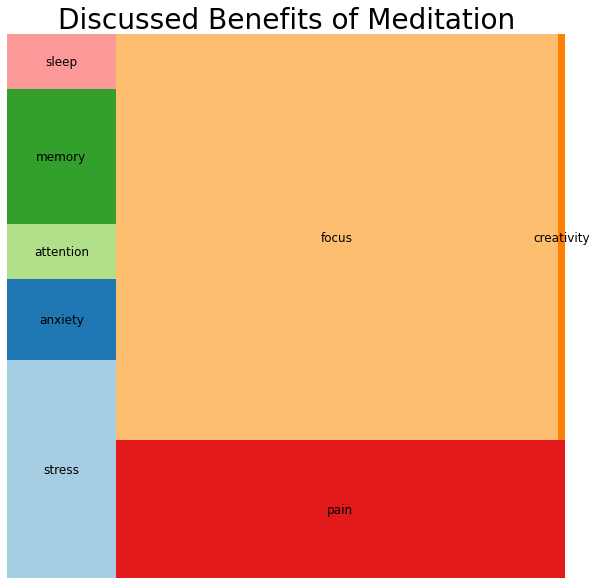

<Figure size 432x288 with 0 Axes>

In [10]:

cmap = matplotlib.cm.Paired
colors = []
for i in range(len(benifits_nonzero['Benefits'])):
    colors.append(cmap(i))

plt.figure(figsize = (10, 10))
squarify.plot(sizes= benifits_nonzero['Count'],
              label=  (benifits_nonzero['Benefits']),
              color= colors,
              text_kwargs={'fontsize': 12})

plt.title('Discussed Benefits of Meditation', fontsize=28)
plt.axis('off')
plt.show()
